In [278]:
import pandas as pd

In [279]:
df=pd.read_csv('Tesla.csv')

In [280]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [281]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [282]:
df1=df.reset_index()['Close']

In [283]:
df1

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
1687    246.169998
1688    258.000000
1689    255.729996
1690    262.049988
1691    261.500000
Name: Close, Length: 1692, dtype: float64

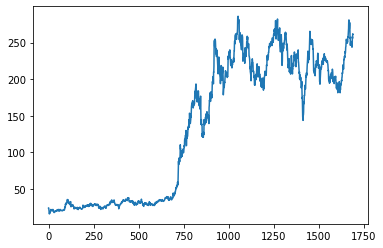

In [284]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [285]:
import numpy as np

In [286]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [287]:
print(df1)

[[0.02993635]
 [0.02971433]
 [0.02279455]
 ...
 [0.88784039]
 [0.91122698]
 [0.9091918 ]]


In [288]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [289]:
training_size,test_size

(1099, 593)

In [290]:
train_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.82567342],
       [0.79621815],
       [0.8341474 ]])

In [291]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [292]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [293]:
print(X_train.shape), print(y_train.shape)

(998, 100)
(998,)


(None, None)

In [294]:
print(X_test.shape), print(ytest.shape)

(492, 100)
(492,)


(None, None)

In [295]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [296]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [297]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [298]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_22 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [299]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
16/16 [==============================] - 17s 378ms/step - loss: 0.0462 - val_loss: 0.0418
Epoch 2/20
16/16 [==============================] - 4s 259ms/step - loss: 0.0048 - val_loss: 0.0099
Epoch 3/20
16/16 [==============================] - 4s 276ms/step - loss: 0.0022 - val_loss: 0.0043
Epoch 4/20
16/16 [==============================] - 4s 285ms/step - loss: 0.0017 - val_loss: 0.0035
Epoch 5/20
16/16 [==============================] - 4s 273ms/step - loss: 0.0016 - val_loss: 0.0035
Epoch 6/20
16/16 [==============================] - 4s 261ms/step - loss: 0.0015 - val_loss: 0.0034
Epoch 7/20
16/16 [==============================] - 4s 251ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 8/20
16/16 [==============================] - 4s 228ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 9/20
16/16 [==============================] - 4s 231ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 10/20
16/16 [==============================] - 4s 241ms/step - loss: 0.0015 - val_loss: 0.004

In [300]:
import tensorflow as tf

In [301]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 50ms/step


In [302]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [303]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

120.00539757422966

In [304]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

224.10855469528448

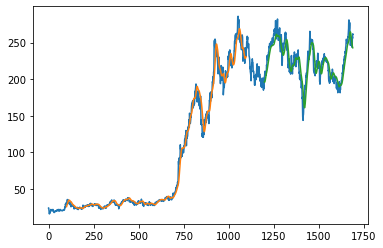

In [305]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [306]:
len(test_data)

593

In [307]:
x_input=test_data[493:].reshape(1,-1)
x_input.shape

(1, 100)

In [308]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [309]:
temp_input

[0.6918294433597358,
 0.6902752730444144,
 0.6899052649158253,
 0.6964549612637113,
 0.6815053096005484,
 0.6732163630145528,
 0.6475354765104379,
 0.6372853695397857,
 0.6350650987433915,
 0.6466843997181779,
 0.6564905309783349,
 0.6628922292553653,
 0.6448341925565877,
 0.6274052706977227,
 0.6392835710718171,
 0.6129736215335901,
 0.621558608666269,
 0.6221506342534202,
 0.6396536347066211,
 0.6261841265702445,
 0.6243339194086542,
 0.648941652455318,
 0.6562314723723977,
 0.6692199081446892,
 0.667258692253818,
 0.6430210228419583,
 0.6423919043016313,
 0.6145648292958723,
 0.613047644621711,
 0.6327708603650912,
 0.6292554778593128,
 0.6562684580135578,
 0.6530860979952084,
 0.6526790524196585,
 0.6536041560004536,
 0.6747705296294598,
 0.6767687829672918,
 0.6726613230685616,
 0.6908303684966204,
 0.6917184346304547,
 0.714142934327685,
 0.7101094975170756,
 0.7128848082594609,
 0.7309798305993989,
 0.7538854063611284,
 0.7546625155714822,
 0.7359383746912175,
 0.732274997814997

In [310]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.84098023]
101
1 day input [0.69027527 0.68990526 0.69645496 0.68150531 0.67321636 0.64753548
 0.63728537 0.6350651  0.6466844  0.65649053 0.66289223 0.64483419
 0.62740527 0.63928357 0.61297362 0.62155861 0.62215063 0.63965363
 0.62618413 0.62433392 0.64894165 0.65623147 0.66921991 0.66725869
 0.64302102 0.6423919  0.61456483 0.61304764 0.63277086 0.62925548
 0.65626846 0.6530861  0.65267905 0.65360416 0.67477053 0.67676878
 0.67266132 0.69083037 0.69171843 0.71414293 0.7101095  0.71288481
 0.73097983 0.75388541 0.75466252 0.73593837 0.732275   0.74448638
 0.78149052 0.7806024  0.78896532 0.79736527 0.79214768 0.79162962
 0.79111156 0.82130696 0.81327707 0.82356422 0.84354643 0.84713584
 0.86264058 0.88369595 0.88317789 0.87592506 0.87755325 0.86896831
 0.87377881 0.86382474 0.87237269 0.87155859 0.89538921 0.89431617
 0.91133799 0.93768503 0.93779604 0.97986973 0.98127591 0.9767614
 0.93675993 0.94889729 0.96799144 0.95363381 0.88880253 0.89253993
 0.85268646 0.86660005 0.86671106 

9 day output [[0.8358337]]
10 day input [0.65649053 0.66289223 0.64483419 0.62740527 0.63928357 0.61297362
 0.62155861 0.62215063 0.63965363 0.62618413 0.62433392 0.64894165
 0.65623147 0.66921991 0.66725869 0.64302102 0.6423919  0.61456483
 0.61304764 0.63277086 0.62925548 0.65626846 0.6530861  0.65267905
 0.65360416 0.67477053 0.67676878 0.67266132 0.69083037 0.69171843
 0.71414293 0.7101095  0.71288481 0.73097983 0.75388541 0.75466252
 0.73593837 0.732275   0.74448638 0.78149052 0.7806024  0.78896532
 0.79736527 0.79214768 0.79162962 0.79111156 0.82130696 0.81327707
 0.82356422 0.84354643 0.84713584 0.86264058 0.88369595 0.88317789
 0.87592506 0.87755325 0.86896831 0.87377881 0.86382474 0.87237269
 0.87155859 0.89538921 0.89431617 0.91133799 0.93768503 0.93779604
 0.97986973 0.98127591 0.9767614  0.93675993 0.94889729 0.96799144
 0.95363381 0.88880253 0.89253993 0.85268646 0.86660005 0.86671106
 0.86841322 0.87244671 0.87111456 0.86141944 0.85505472 0.8477649
 0.84328743 0.85246444 

17 day output [[0.8185344]]
18 day input [0.63965363 0.62618413 0.62433392 0.64894165 0.65623147 0.66921991
 0.66725869 0.64302102 0.6423919  0.61456483 0.61304764 0.63277086
 0.62925548 0.65626846 0.6530861  0.65267905 0.65360416 0.67477053
 0.67676878 0.67266132 0.69083037 0.69171843 0.71414293 0.7101095
 0.71288481 0.73097983 0.75388541 0.75466252 0.73593837 0.732275
 0.74448638 0.78149052 0.7806024  0.78896532 0.79736527 0.79214768
 0.79162962 0.79111156 0.82130696 0.81327707 0.82356422 0.84354643
 0.84713584 0.86264058 0.88369595 0.88317789 0.87592506 0.87755325
 0.86896831 0.87377881 0.86382474 0.87237269 0.87155859 0.89538921
 0.89431617 0.91133799 0.93768503 0.93779604 0.97986973 0.98127591
 0.9767614  0.93675993 0.94889729 0.96799144 0.95363381 0.88880253
 0.89253993 0.85268646 0.86660005 0.86671106 0.86841322 0.87244671
 0.87111456 0.86141944 0.85505472 0.8477649  0.84328743 0.85246444
 0.89624035 0.88784039 0.91122698 0.9091918  0.84098023 0.84245658
 0.84359539 0.8441053  0

25 day output [[0.8048622]]
26 day input [0.6423919  0.61456483 0.61304764 0.63277086 0.62925548 0.65626846
 0.6530861  0.65267905 0.65360416 0.67477053 0.67676878 0.67266132
 0.69083037 0.69171843 0.71414293 0.7101095  0.71288481 0.73097983
 0.75388541 0.75466252 0.73593837 0.732275   0.74448638 0.78149052
 0.7806024  0.78896532 0.79736527 0.79214768 0.79162962 0.79111156
 0.82130696 0.81327707 0.82356422 0.84354643 0.84713584 0.86264058
 0.88369595 0.88317789 0.87592506 0.87755325 0.86896831 0.87377881
 0.86382474 0.87237269 0.87155859 0.89538921 0.89431617 0.91133799
 0.93768503 0.93779604 0.97986973 0.98127591 0.9767614  0.93675993
 0.94889729 0.96799144 0.95363381 0.88880253 0.89253993 0.85268646
 0.86660005 0.86671106 0.86841322 0.87244671 0.87111456 0.86141944
 0.85505472 0.8477649  0.84328743 0.85246444 0.89624035 0.88784039
 0.91122698 0.9091918  0.84098023 0.84245658 0.84359539 0.8441053
 0.84391826 0.84309286 0.84174562 0.84000772 0.83800274 0.83583373
 0.83358145 0.83130419

In [311]:
df3=scaler.inverse_transform(lst_output).tolist()
df3


[[243.06650540016668],
 [243.4654735473802],
 [243.77322458378302],
 [243.91102475736338],
 [243.86047923489755],
 [243.63742174761052],
 [243.273342574795],
 [242.80369445544],
 [242.26186836088758],
 [241.67571426192922],
 [241.0670579020133],
 [240.4516524745661],
 [239.8402578294943],
 [239.23980021748633],
 [238.65412934532017],
 [238.08535530332185],
 [237.53420293167966],
 [237.0007366606326],
 [236.48448937094818],
 [235.98488119047576],
 [235.50126781682567],
 [235.03311770052653],
 [234.57997982990557],
 [234.14132265549136],
 [233.71672738073062],
 [233.30596849978704],
 [232.90859500098782],
 [232.52438137849666],
 [232.15295715843945],
 [231.79406461986042]]

In [312]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [313]:
len(df1)

1692

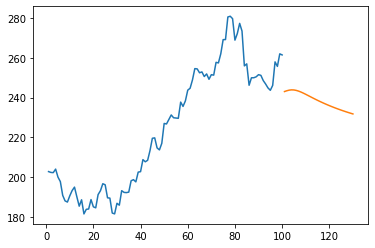

In [314]:
plt.plot(day_new,scaler.inverse_transform(df1[1592:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

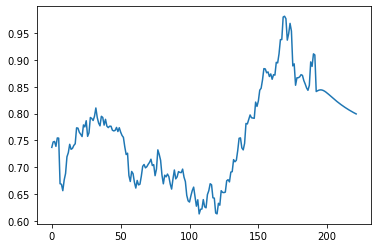

In [315]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

[[23.889999],
 [23.83],
 [21.959999],
 [19.200001],
 [16.110001],
 [15.8],
 [17.459999],
 [17.4],
 [17.049999],
 [18.139999],
 [19.84],
 [19.889999],
 [20.639999],
 [21.91],
 [20.299999],
 [20.219999],
 [21.0],
 [21.290001],
 [20.950001],
 [20.549999],
 [20.719998999999998],
 [20.35],
 [19.940001],
 [20.92],
 [21.950001],
 [21.26],
 [20.450001],
 [19.59],
 [19.6],
 [19.030000999999995],
 [17.9],
 [17.6],
 [18.32],
 [18.780001],
 [19.15],
 [18.77],
 [18.790001],
 [19.1],
 [20.129999],
 [19.200001],
 [19.9],
 [19.75],
 [19.700001],
 [19.870001],
 [19.48],
 [20.450001],
 [21.059999],
 [21.049999],
 [20.540001],
 [20.9],
 [20.709999],
 [20.17],
 [20.719998999999998],
 [21.120001],
 [21.98],
 [20.940001],
 [20.23],
 [21.059999],
 [20.77],
 [19.870001],
 [19.559999],
 [20.1],
 [20.530001],
 [21.4],
 [21.98],
 [20.41],
 [20.600000000000005],
 [20.99],
 [21.120001],
 [20.459999],
 [20.43],
 [20.43],
 [20.24],
 [20.24],
 [20.540001],
 [20.75],
 [20.540001],
 [20.23],
 [20.049999],
 [20.65],
 [2

In [78]:
len(df3)

1752